## 1. Ziskavanie dát 

Projekt Murder Accountability je najkompletnejšia databáza vrážd v USA, ktorá je v súčasnosti k dispozícii. Tento súbor údajov obsahuje vraždy od doplňujúcej správy o vražde FBI z roku 1976 po súčasnosť a údaje zákona o slobode informácií o viac ako 22 000 vraždách, ktoré neboli oznámené ministerstvu spravodlivosti. Tento súbor údajov obsahuje okrem vzťahu medzi obeťou a páchateľom a použitej zbrane aj vek, rasu, pohlavie, etnickú príslušnosť obetí a páchateľov.

Naše dáta obsahujú viac ako 100 MB záznamov, mnohé kategorické premenné a pod. a preto si potrebujeme najprv upraviť dataset, predpripraviť ho na použitie a následne importovat do našej navrdhnutej siete.

Ako výsledok dosiahneme očistené transformované dáta od outlierov, nepresných hodnôt a použijeme subset dát na základe kritérií, ktorý si následne vzesportujeme do csv pre daľšie použitie.

Zdroj: https://www.kaggle.com/murderaccountability/homicide-reports/code

### Vlastnosti datasetu
<ol>
    <li>Record ID: Číslo záznamu vraždy </li>
    <li>Agency Code: Kódové meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Name: Plné meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Type: Typ zastupiteľstva: a. 'Municipal Police', b. 'County Police', c. 'State Police', d. 'Sheriff',
       e. 'Special Police', f. 'Regional Police', g. 'Tribal Police'</li>
    <li>City: Mesto, v ktorom sa stal zločin. </li>
    <li>State: Štát, v ktotom sa zločin odohral. </li>
    <li>Year: Rok spáchaného zločinu, z časového obdobia od roku 1980 - 2014 </li>
    <li>Month: Mesiac, v ktorom sa zločin stal. Formát je January - December  </li>
    <li>Incident: Číslená hodnota koľko zločinov sa stalo za dané obobie. Napríklad za Marec 1980 bola spáchaná vražda v Aliaške druhý krát. Hodnota bude 2. </li>
    <li>Crime type: Klasfikuje čin do dvoch kategórií: 'Murder or Manslaughter' == 'Vražda alebo Zabitie' a 'Manslaughter by Negligence' == 'Zabitie z nedbanlivosti' </li>
    <li>Crime Solved: Klasifikuje, či bol zločiť vyrierený. Bud 'Yes' == 'Áno' alebo 'No' == 'Nie' </li>
    <li>Victim Sex: Klasifikácia pohlavia obete. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c.'Unknown' == 'Neidentifikované' </li>
    <li>Victim Age: Vek obete. </li>
    <li>Victim Race: Krasifikácia posla rasy obete. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Victim Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic'  </li>
    <li>Perpetrator Sex: Klasifikácia pohlavia páchteľa. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c. 'Unknown' == 'Neidentifikované' </li>
    <li>Perpetrator Age:  Vek páchateľa. Ak vek páchateľa je neznámy, záznam obsahuje nulu. </li>
    <li>Perpetrator Race: Krasifikácia posla rasy páchateľa. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Perpetrator Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic' </li>
    <li>Relationship: Klasifikikácia vsťahu medzi obeťou a páchateľom. 28 rôznych kategórií. </li>
    <li>Weapon: Klasifikácia podľa zbrane, ktorá bola použitá pri čine. 17 rôznych kategórií. </li>
    <li>Victim Count: Počet obetí. </li>
    <li>Perpetrator Count: Počet páchateľov. </li>
    <li>Record Source: Klasifikácia zdroja informácií. Informácie pochádzajú z 2 zdrojov: a. 'FBI' == 'Federal Bureau of Investigation' b. 'FIOA' == 'Freedom of Information Act' </li>
</ol>

In [1]:
# importing keras library to work with the Neural Networks design
import keras
# importing padnas to work with files / csv-s containing the datasets
import pandas as pd
# importing numpy lib for faster manipulation with data supporting math 
import numpy as np

# lets prepare both of them and  later we will see which one is better for visualization of the data
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
from dython.data_utils import split_hist

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
file = pd.read_csv("database.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
file.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
# skontrolujeme aký tvar má databáza, s ktorou budeme pracovať
file.shape

(638454, 24)

In [5]:
# vidíme, že Peretrator Age zaradilo ako objekt napriek tomu, že to má byť int. 
# Indikuje chýbajúce hodonoty alebo hodoty nie int 
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

## Pochopenie a Vizualizácia dát
#### Pre lepsie pochopenie si vyzualizujeme jednotlive stlpce

<AxesSubplot:xlabel='Month', ylabel='count'>

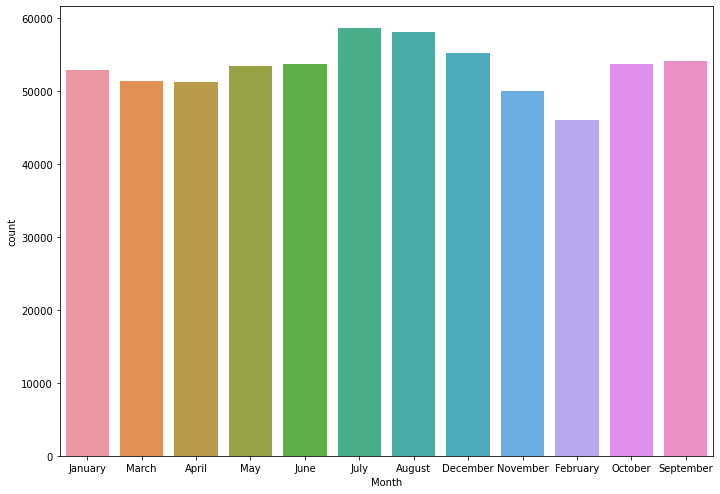

In [6]:
# Pomocou stĺpcového grafu s 
# funkciou počítania skúmame počet trestných činov, 
# ktoré sa stali v určitom mesiaci
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Month', data = file, ax=ax)


<AxesSubplot:xlabel='Month', ylabel='count'>

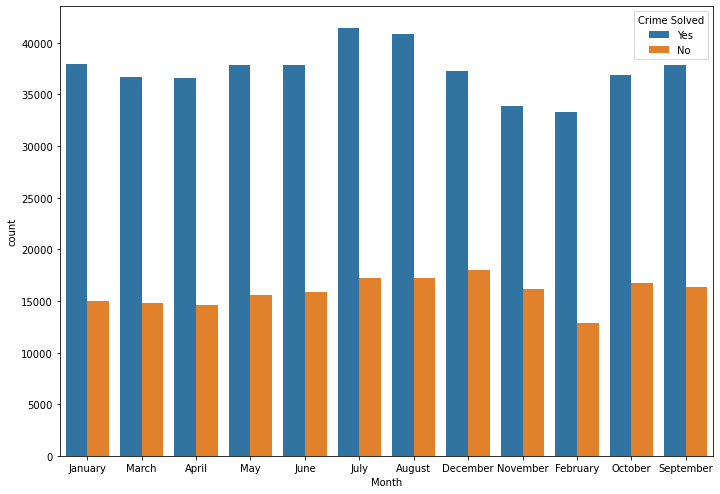

In [7]:
# Pomocou stĺpcového grafu s 
# funkciou počítania skúmame počet trestných činov, 
# ktoré sa stali v určitom mesiaci s nahdliadnutim na rozdelenie medzi vyriesenymi
# a nevyriesenymi pripadmi
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Month', data = file, hue = 'Crime Solved', ax=ax)


<AxesSubplot:xlabel='Year', ylabel='count'>

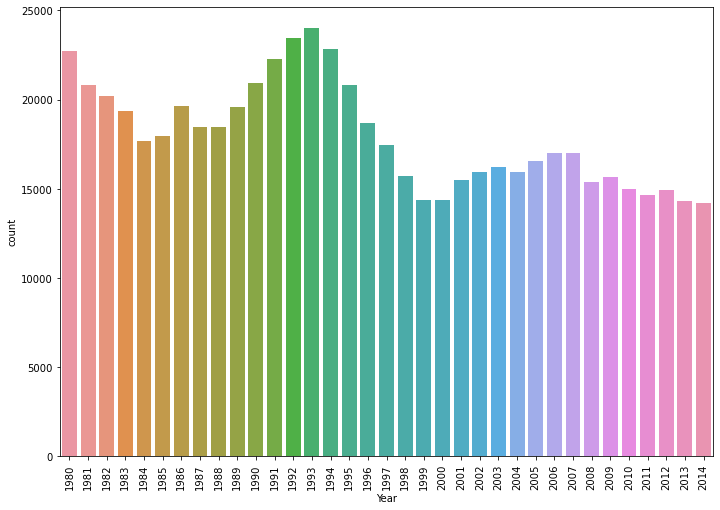

In [56]:
# Pomocou stĺpcového grafu s 
# funkciou počítania skúmame počet trestných činov, 
# ktoré sa stali v pocas rokov

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Year', data = file, ax=ax)

<AxesSubplot:xlabel='Year', ylabel='count'>

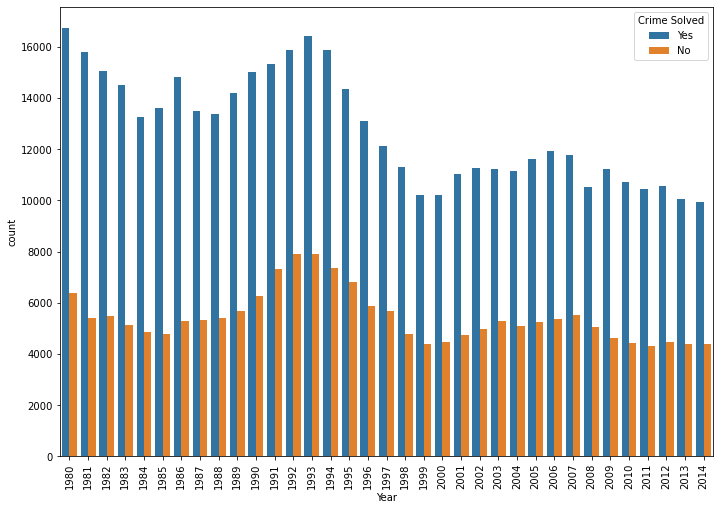

In [8]:
# Pomocou stĺpcového grafu s 
# funkciou počítania skúmame počet trestných činov, 
# ktoré sa stali v pocas rokov s nahdliadnutim na rozdelenie medzi vyriesenymi
# a nevyriesenymi pripadmi
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Year', hue='Crime Solved', data = file, ax=ax)

<AxesSubplot:xlabel='City', ylabel='count'>

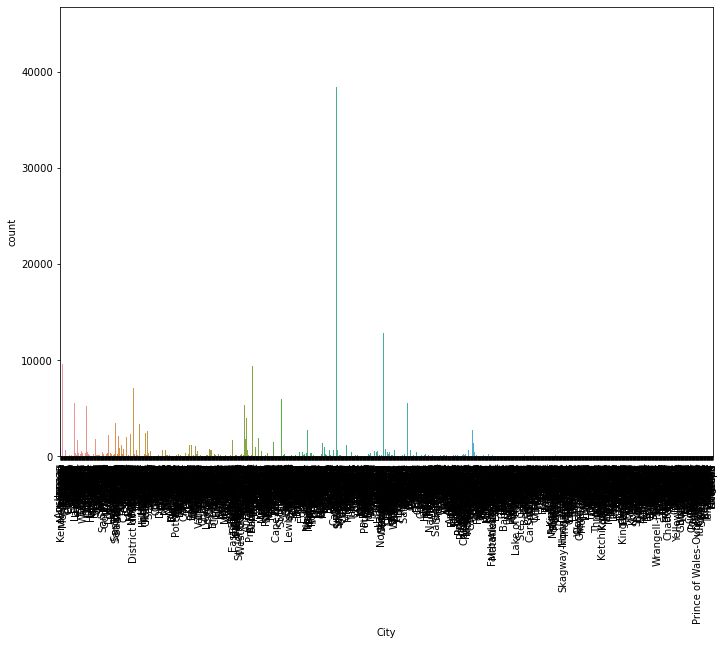

In [9]:
# Pomocou stĺpcového grafu s 
# funkciou počítania skúmame počet trestných činov, 
# ktoré sa stali v určitom Meste, pre lepsiucitatelnost je vertikany graf
# avsak ako mozeme videit, je tam priliz veca roznych miest, aby sa to dalo vobec prehladne pozriet
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'City', data = file, ax=ax)

<AxesSubplot:xlabel='State', ylabel='count'>

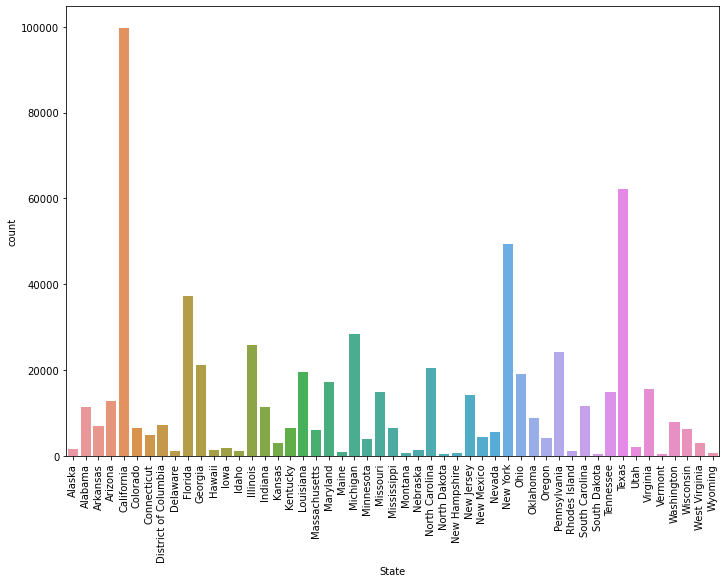

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'State', data = file, ax=ax)

<AxesSubplot:xlabel='State', ylabel='count'>

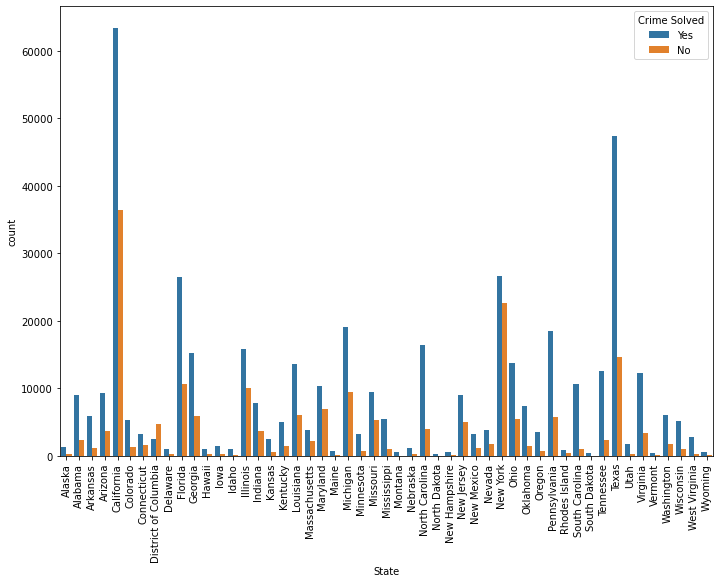

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'State', data = file, ax=ax, hue = 'Crime Solved')

<AxesSubplot:xlabel='State', ylabel='Incident'>

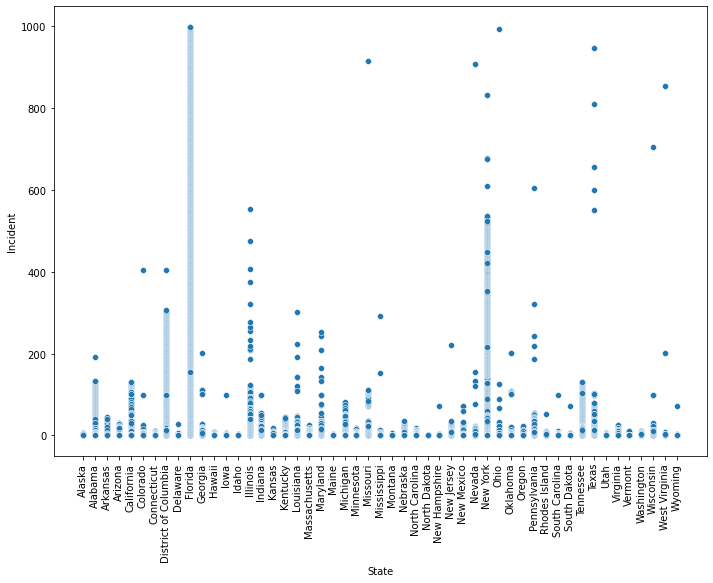

In [12]:
fig, ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.scatterplot(data = file, x='State', y='Incident')

<AxesSubplot:xlabel='Agency Type', ylabel='count'>

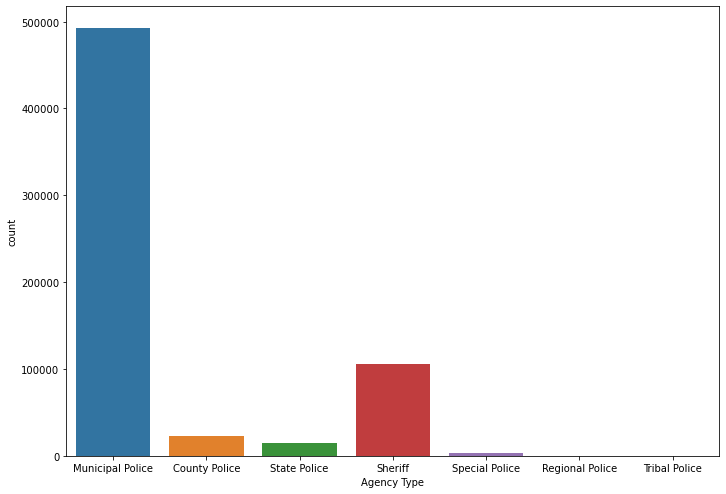

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Agency Type', data = file, ax=ax)

<AxesSubplot:xlabel='Incident', ylabel='count'>

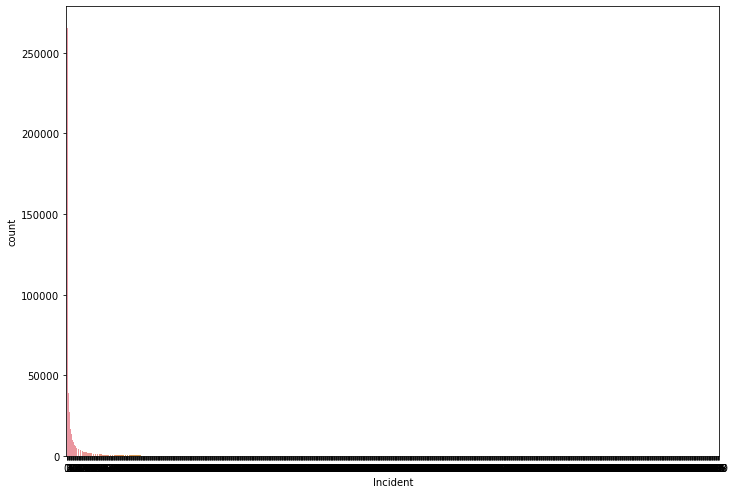

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Incident', data = file, ax=ax)

<AxesSubplot:xlabel='Crime Type', ylabel='count'>

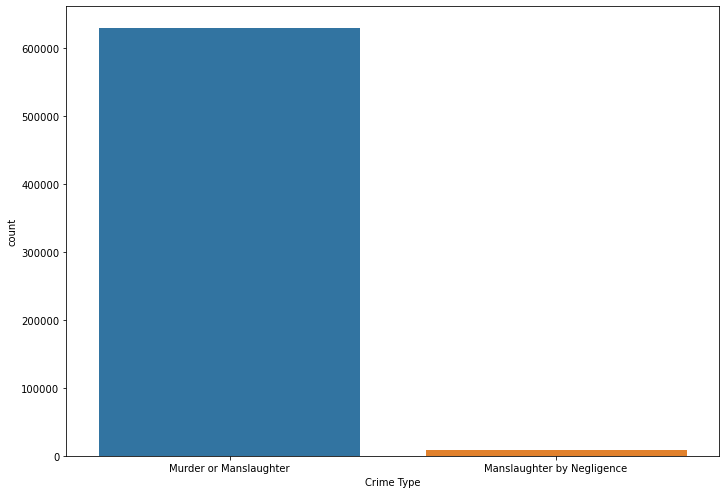

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Crime Type', data = file, ax=ax)

<AxesSubplot:xlabel='Crime Solved', ylabel='count'>

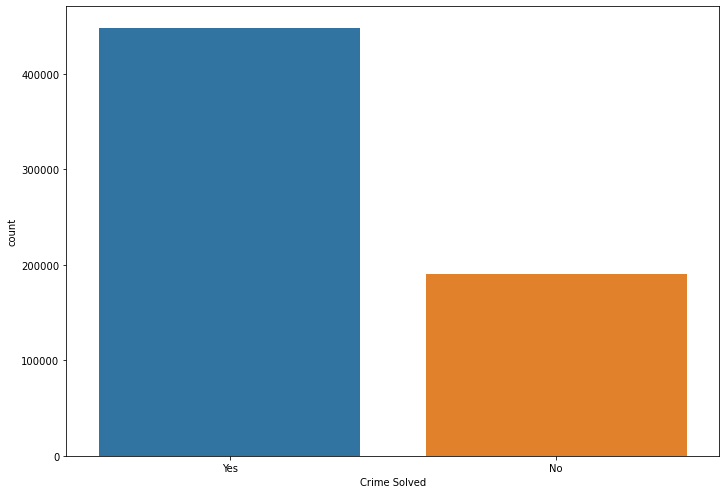

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Crime Solved', data = file, ax=ax)

<AxesSubplot:xlabel='Victim Sex', ylabel='count'>

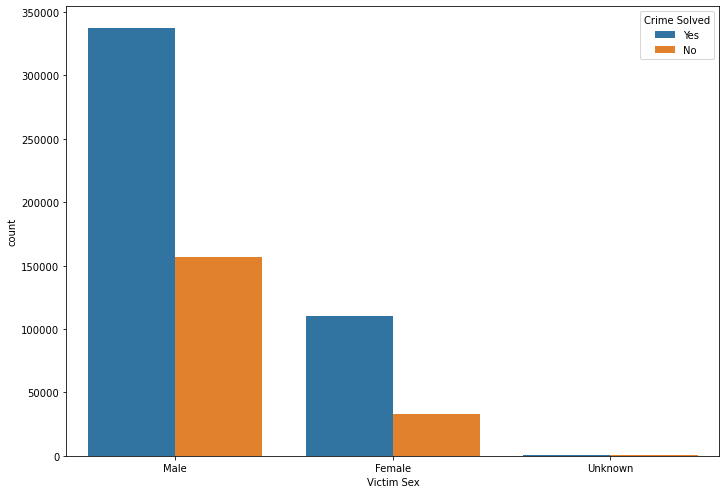

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Victim Sex', data = file, hue= 'Crime Solved', ax=ax)

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

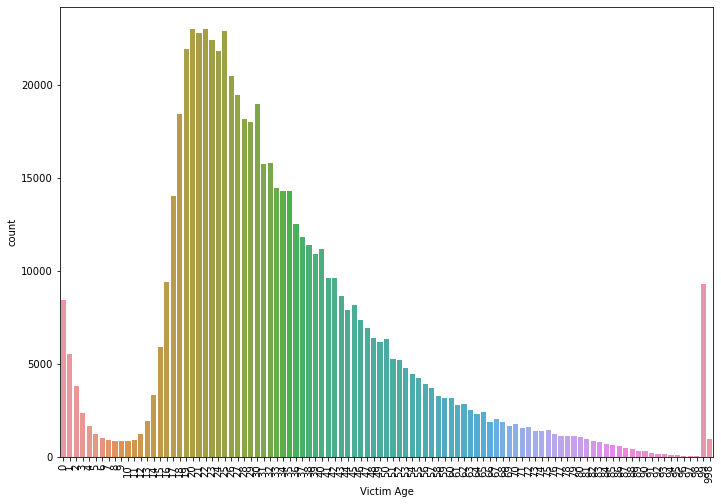

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Victim Age', data = file, ax=ax)

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

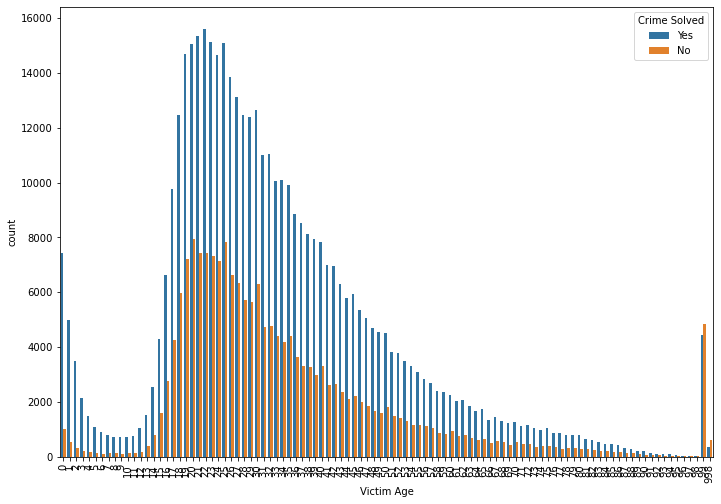

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Victim Age', hue= 'Crime Solved',data = file, ax=ax)

<AxesSubplot:xlabel='Victim Race', ylabel='count'>

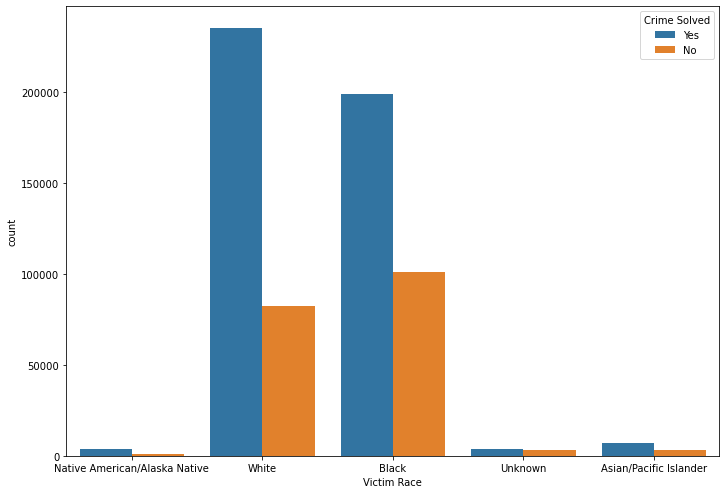

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Victim Race', data = file, hue= 'Crime Solved', ax=ax)

<AxesSubplot:xlabel='Victim Race', ylabel='count'>

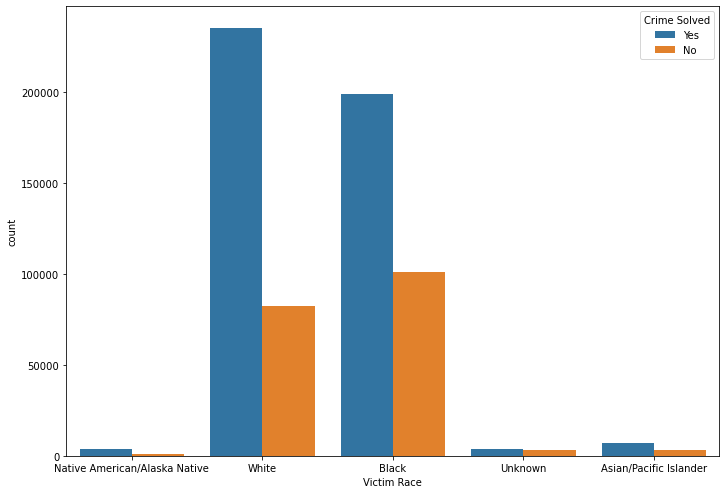

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Victim Race', data = file, hue= 'Crime Solved', ax=ax)

<AxesSubplot:xlabel='Victim Ethnicity', ylabel='count'>

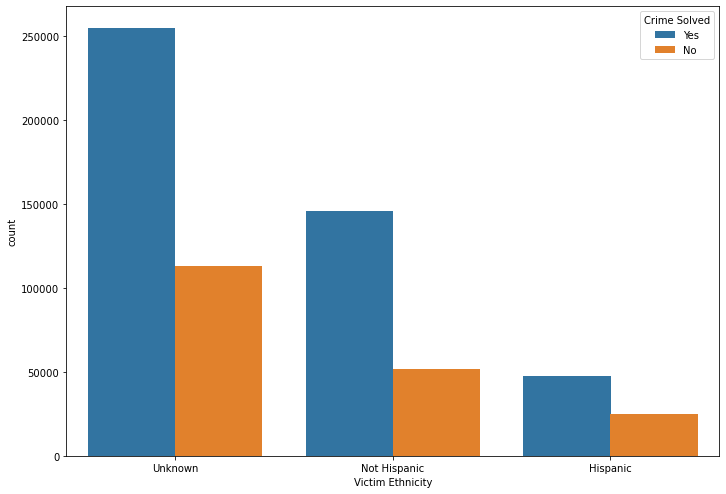

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Victim Ethnicity', data = file, hue= 'Crime Solved', ax=ax)

<AxesSubplot:xlabel='Perpetrator Sex', ylabel='count'>

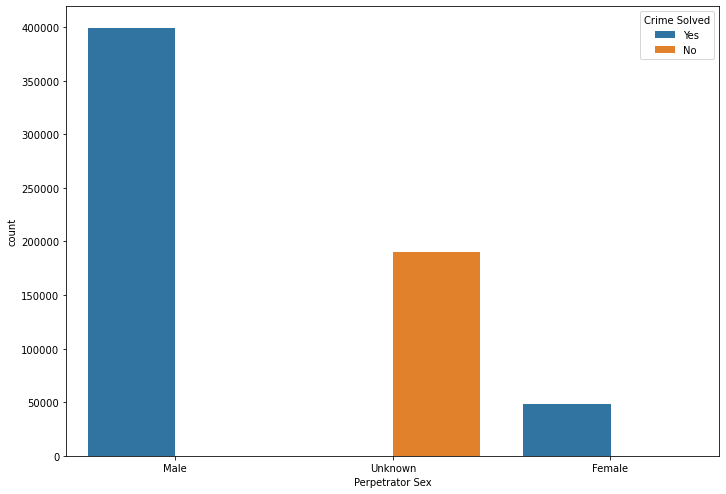

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Perpetrator Sex', data = file, hue= 'Crime Solved', ax=ax)

<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

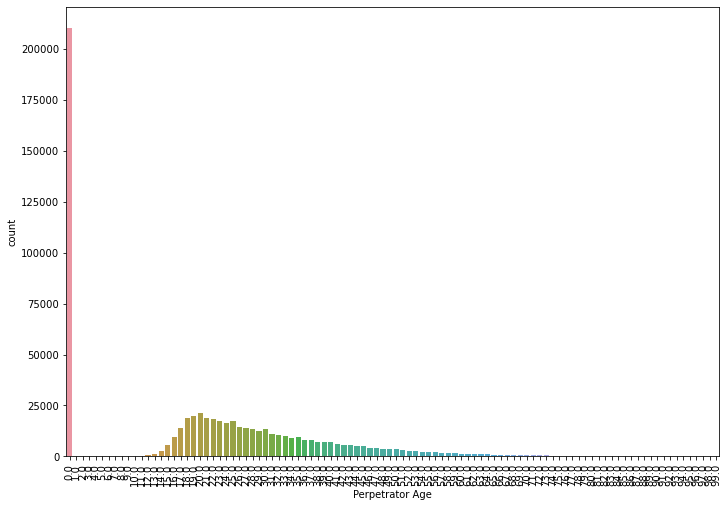

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Perpetrator Age', data = file, ax=ax)

<AxesSubplot:xlabel='Perpetrator Race', ylabel='count'>

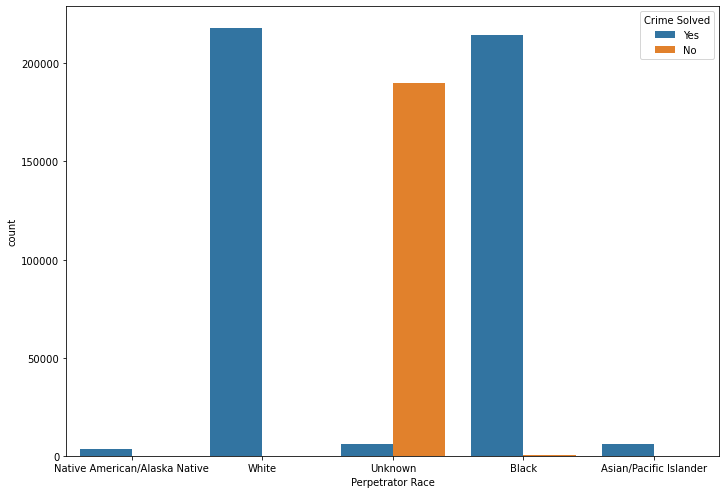

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Perpetrator Race', data = file, hue= 'Crime Solved', ax=ax)

<AxesSubplot:xlabel='Perpetrator Ethnicity', ylabel='count'>

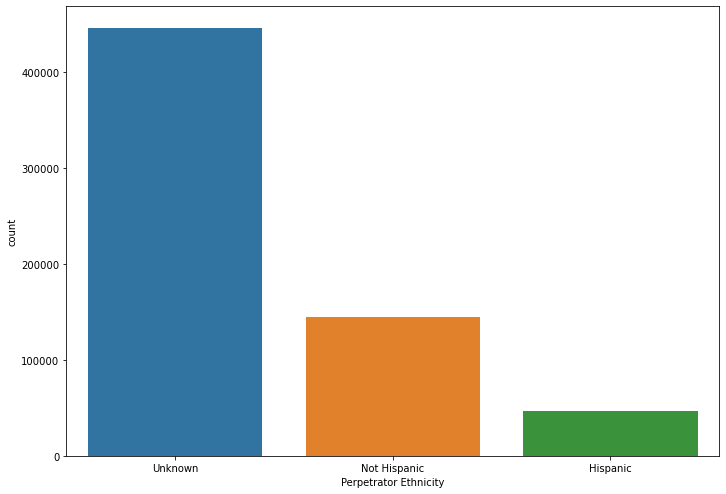

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Perpetrator Ethnicity', data = file, ax=ax)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

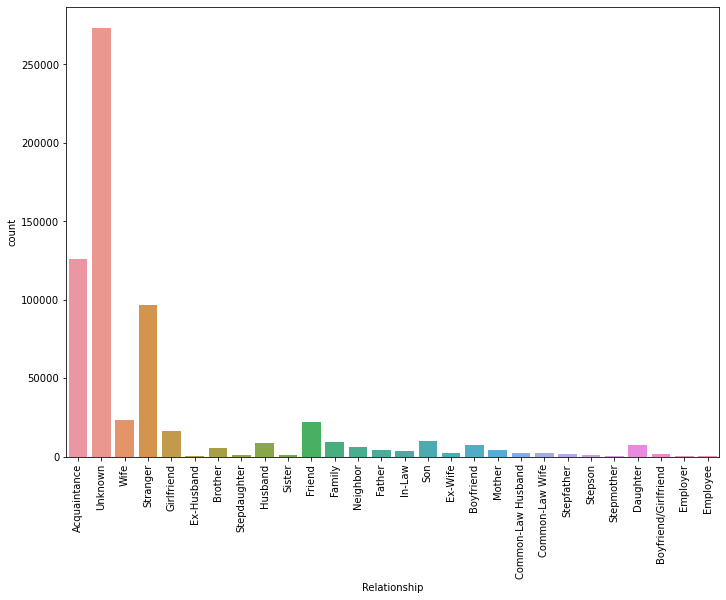

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Relationship', data = file, ax=ax)

<AxesSubplot:xlabel='Weapon', ylabel='count'>

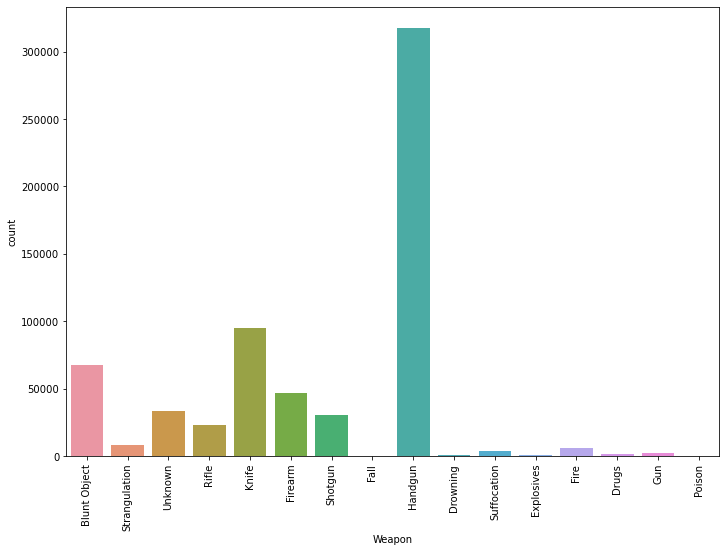

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Weapon', data = file, ax=ax)

<AxesSubplot:xlabel='Victim Count', ylabel='count'>

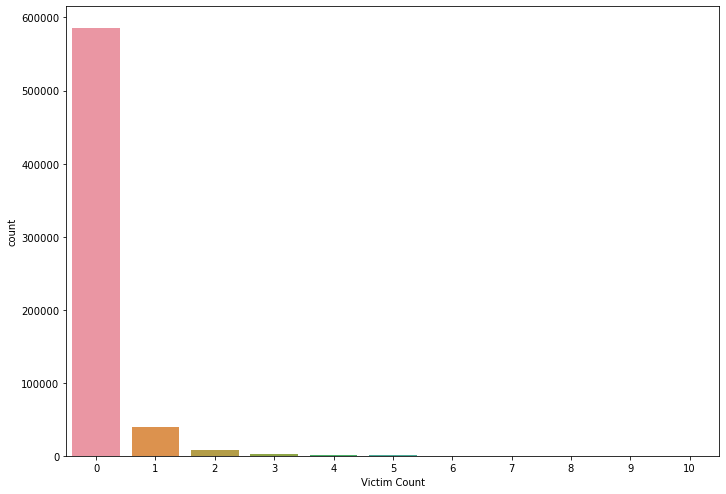

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Victim Count', data = file, ax=ax)

<AxesSubplot:xlabel='Perpetrator Count', ylabel='count'>

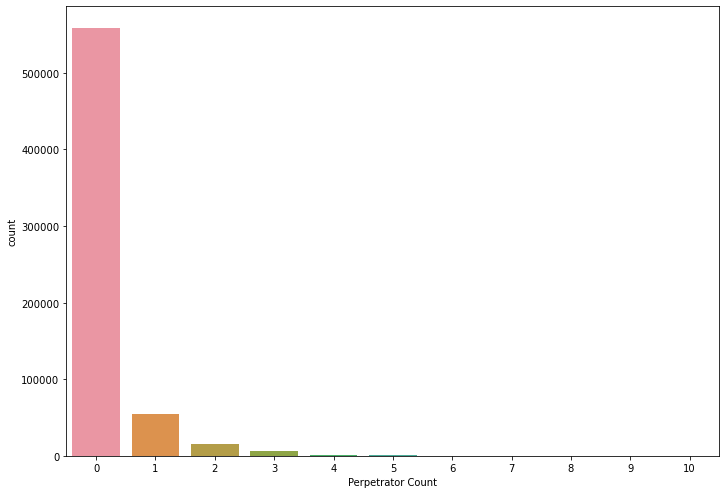

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Perpetrator Count', data = file, ax=ax)

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

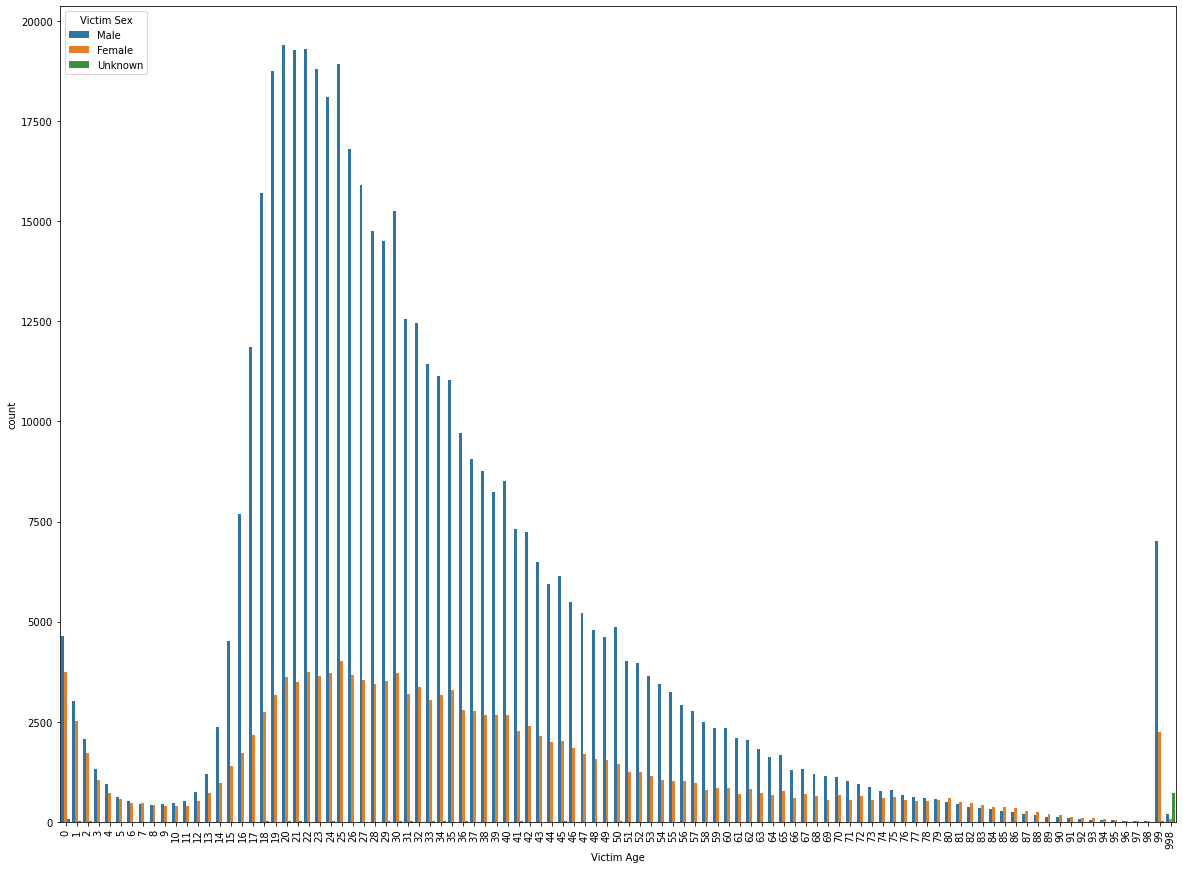

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
plt.xticks(rotation= 'vertical')
sns.countplot(x='Victim Age', hue='Victim Sex',data = file)

<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

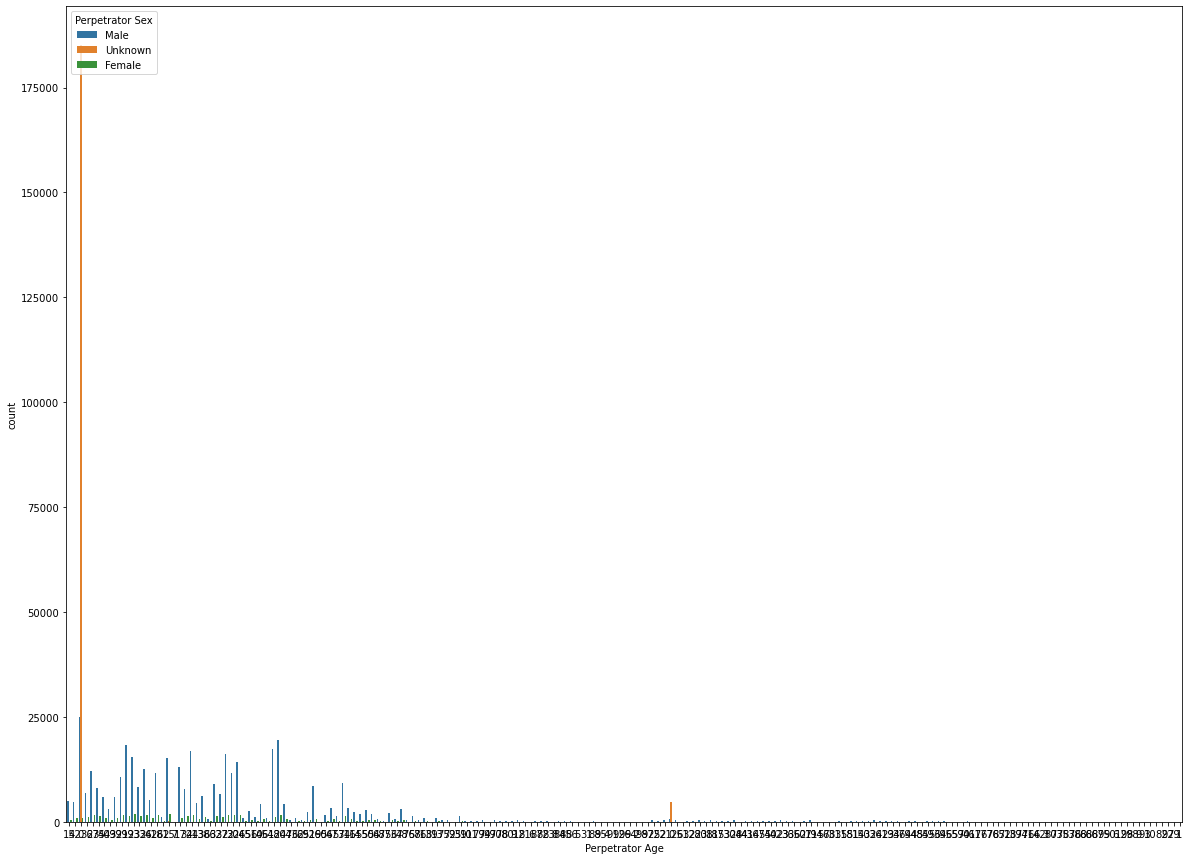

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.countplot(x='Perpetrator Age', hue='Perpetrator Sex',data = file)

In [34]:
# Premenima na numerical s tým, že nenumerická hodnota sa nahradí NaM
file['Perpetrator Age']=pd.to_numeric(file['Perpetrator Age'], errors='coerce')

In [35]:
# vidime, ze mame jened NaN, ten riadok mozeme dropnut, a nestratime ziadne relevantne data
file.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          1
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [36]:
file = file.dropna()

In [37]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638453 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              638453 non-null  int64  
 1   Agency Code            638453 non-null  object 
 2   Agency Name            638453 non-null  object 
 3   Agency Type            638453 non-null  object 
 4   City                   638453 non-null  object 
 5   State                  638453 non-null  object 
 6   Year                   638453 non-null  int64  
 7   Month                  638453 non-null  object 
 8   Incident               638453 non-null  int64  
 9   Crime Type             638453 non-null  object 
 10  Crime Solved           638453 non-null  object 
 11  Victim Sex             638453 non-null  object 
 12  Victim Age             638453 non-null  int64  
 13  Victim Race            638453 non-null  object 
 14  Victim Ethnicity       638453 non-nu

In [38]:
file.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,638453.000000,638453.000000,638453.000000,638453.000000,638453.000000,638453.000000,638453.000000
mean,319227.005932,1995.801074,22.967797,35.033495,20.322697,0.123334,0.185224
std,184305.660258,9.927675,92.149837,41.628336,17.886842,0.537734,0.585496
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.000000,1987.000000,1.000000,22.000000,0.000000,0.000000,0.000000
50%,319227.000000,1995.000000,2.000000,30.000000,21.000000,0.000000,0.000000
75%,478840.000000,2004.000000,10.000000,42.000000,31.000000,0.000000,0.000000
max,638454.000000,2014.000000,999.000000,998.000000,99.000000,10.000000,10.000000


In [39]:
# Victime age Max je 998, co je divné čislo, preto odstránime všetkz riadky co majú 998 ako hodnotu
file[file['Victim Age'] == 998].shape[0]

974

In [40]:
# rovnako si to mozeme vyzualizovat cez boxplot, aby sme si overili, 
# ci naozj ostatne data su v poriadku alebo aj tam sa nachadzju velke odchylky
file_to_see_outliers = file.drop(labels=['Record ID', 'Year', 'Incident'], axis=1)

file_to_see_outliers2 = file.drop(labels=['Record ID', 'Year','Victim Age', 'Perpetrator Age', 'Victim Count',
    'Perpetrator Count', ], axis=1)

<AxesSubplot:>

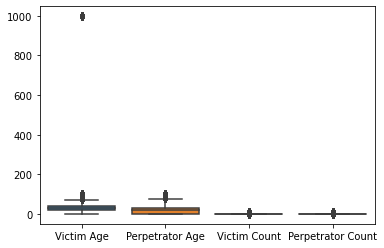

In [41]:
sns.boxplot(data = file_to_see_outliers)

<AxesSubplot:>

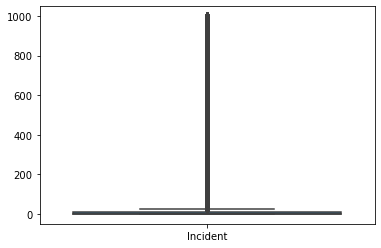

In [42]:
sns.boxplot(data = file_to_see_outliers2)


In [43]:
# ostranime zaznamy, kde Victime age je nad 998
temp_to_delete = []
for x,y in zip(file['Record ID'],file['Victim Age']):
    if y==998:
        temp_to_delete.append(x-1)
    

In [44]:
file = file.drop(labels=temp_to_delete, axis=0)

In [45]:
file[file['Victim Age'] == 998].shape[0]

0

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

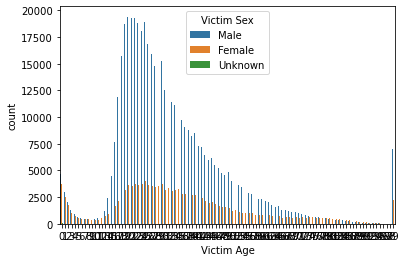

In [46]:
# pozrieme sa na zvysne zaznamy v Victim Age. Ukazuje sa, ze mame viac ako 7500 zabiti osob vo veku 99
sns.countplot(x='Victim Age', hue='Victim Sex',data = file)

In [47]:
# po kontrolovani ich mame 9281, tieto zaznamy odstranime
file[file['Victim Age'] == 99].shape[0]

9281

In [48]:
temp_to_delete.clear()
for x,y in zip(file['Record ID'],file['Victim Age']):
    if y==99:
        temp_to_delete.append(x-1)
    

In [49]:
file = file.drop(labels=temp_to_delete, axis=0)

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

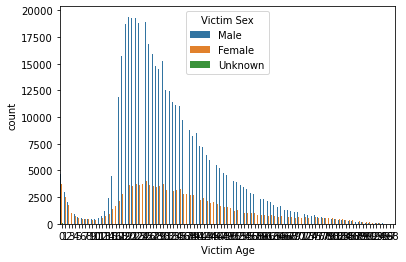

In [50]:
sns.countplot(x='Victim Age', hue='Victim Sex',data = file)

<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

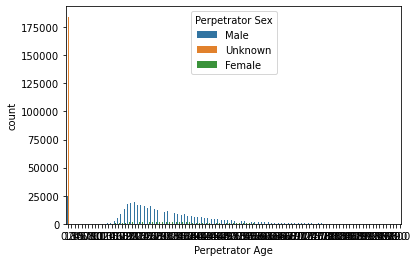

In [51]:
# rovnakto vid9me extremny zaznam, pri veku utocnika a to, viac 175000 je na 0 
sns.countplot(x='Perpetrator Age', hue='Perpetrator Sex',data = file)

<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

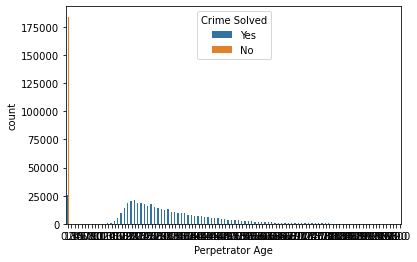

In [52]:
# ak si porovname s predchadzajucim grafom, tak vidime, ze sa jedna o neobjasnene pripady
sns.countplot(x='Perpetrator Age', hue='Crime Solved',data = file)

In [53]:
# skusime si pozriet kolko krat sa nachadza dana hodnota v nasom datasete
file[(file['Perpetrator Sex'] == 'Unknown')].shape[0]

184930

In [54]:
# ako vidime, ich cisla celkom su zhodne, ale kedze sa jedna o necislene hodnoty, nemozeme pouzit 
# pandas .corr, rovnako este nie je vhodne transformonvat data na ciselne hodnoty napriklad LabelEncoder
# bez toho aby sme lespie vedeli s cim pracujeme
file[(file['Crime Solved'] == 'No')].shape[0]

184846

In [58]:
# https://github.com/shakedzy/dython/blob/master/dython/nominal.py
# kedze mame vacsinu dat v tvare kategorickych premennych pouzijeme 2 testy
# Potrebujeme niečo, čo bude vyzerať ako korelácia, ale bude pracovať s kategorickými hodnotami 
# - alebo formálnejšie, hľadáme mieru asociácie medzi dvoma kategorickými znakmi. 
# Pouzijeme: Cramér’s V. 
# Je založený na nominálnej variácii Pearsonovho testu Chi-Square a má zabudované niektoré
# veľké výhody:
# Podobne ako v prípade korelácie je výstup v rozsahu [0,1], kde 0 znamená žiadnu asociáciu 
# a 1 je úplná asociácia. (Na rozdiel od korelácie neexistujú žiadne záporné hodnoty, pretože neexistuje nič také ako negatívna asociácia. Buď existuje, alebo nie je)
# Rovnako ako korelácia, aj Cramerovo V je symetrické - nie je citlivé na zámenu x a y

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Theil’s U, tiež označovaný ako koeficient neistoty, je založený na podmienenej entropii medzi x a y
# Rovnako ako Cramerovo V, výstupná hodnota je v rozsahu [0,1], s rovnakými interpretáciami 
# ako predtým - ale na rozdiel od Cramerovho V je asymetrický, čo znamená U (x, y) ≠ U (y, x) 
# ( zatiaľ čo V (x, y) = V (y, x), kde V je Cramerovo V). 
# Použitím Theil’s U v jednoduchom prípade vyššie zistíme, že znalosť y znamená, že poznáme x, 
# ale nie naopak.
def theils_u(x,y):
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x
    
# Obe funnkcie su tu iba ilustracne, pre nas pripad budeme pracovat priamo s implementaciou
# balicka, v ktorom ich autor zajrnul
# from dython.nominal import associations

In [59]:
file.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

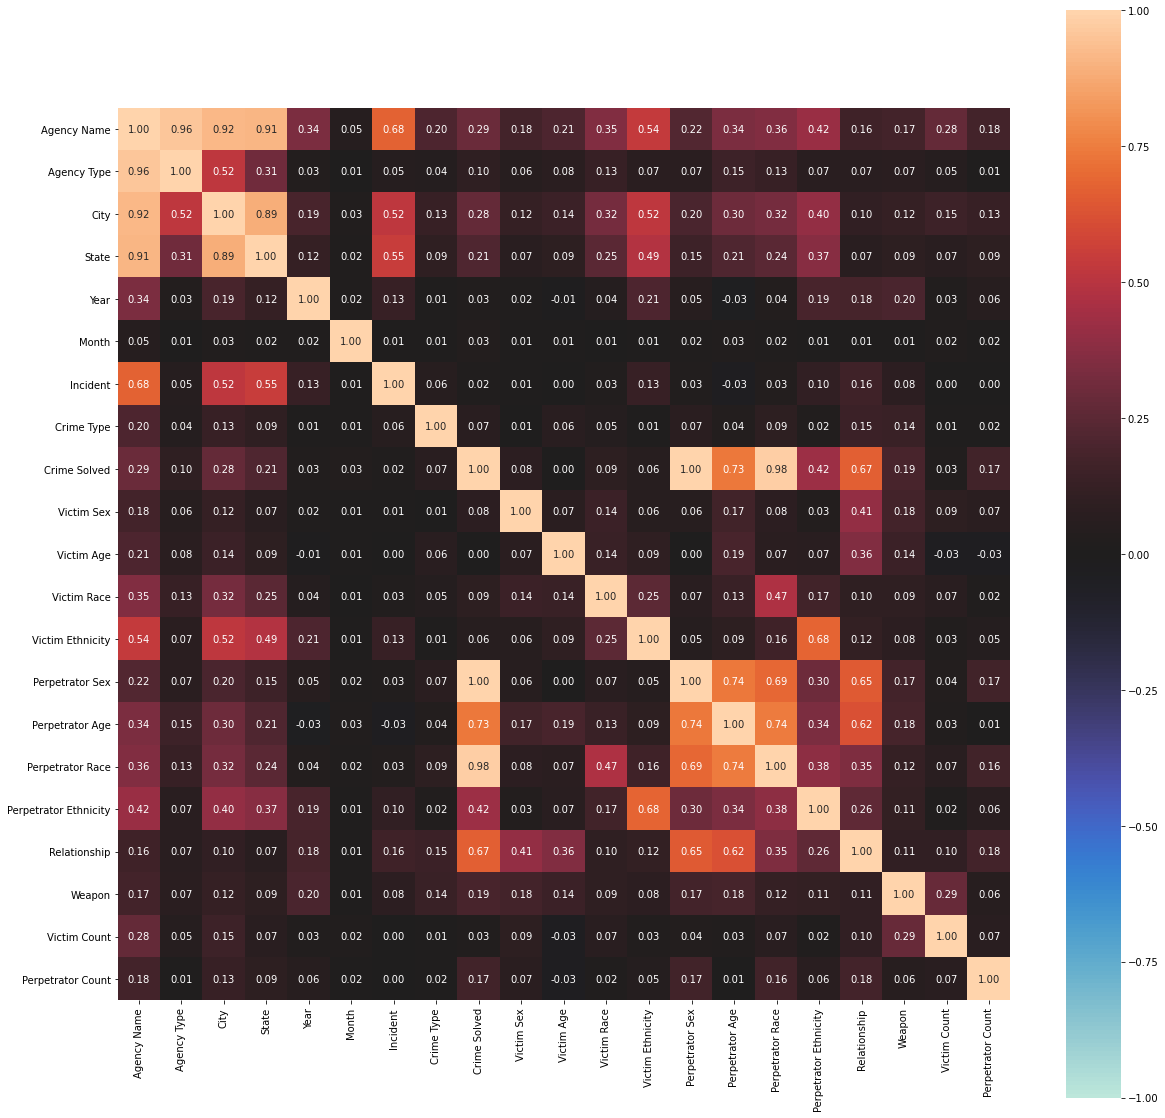

{'corr':                        Agency Name  Agency Type      City     State      Year  \
 Agency Name               1.000000     0.959965  0.919708  0.909333  0.341021   
 Agency Type               0.959965     1.000000  0.520225  0.305746  0.033726   
 City                      0.919708     0.520225  1.000000  0.887576  0.190878   
 State                     0.909333     0.305746  0.887576  1.000000  0.124784   
 Year                      0.341021     0.033726  0.190878  0.124784  1.000000   
 Month                     0.052628     0.005239  0.029251  0.016371  0.020579   
 Incident                  0.675725     0.054528  0.522216  0.549028  0.125515   
 Crime Type                0.204230     0.040602  0.128391  0.094685  0.013680   
 Crime Solved              0.291548     0.099586  0.276639  0.213095  0.030318   
 Victim Sex                0.175946     0.058293  0.118091  0.066396  0.020261   
 Victim Age                0.209794     0.075788  0.140990  0.086793 -0.011356   
 Victim 

In [60]:
#  najprv spravim Cramérov symetricky test
#  vyseparujeme premenne, ktore potrebujeme k analyze a ktore mozeme vynechat
# 'Record ID' <- vynechavame, pretoze sa jedna poradie zaznamu zlociu
# 'Record Source' <- je n8m jedna z kadial pochadzaju zaznami, ci s FBI alebo z FOIA
# 'Agency Code' <- stopercentne koreluje s Agency Name, su zamenitelne

associations(file.drop(labels=['Record ID', 'Record Source', 'Agency Code', ], axis=1), figsize=(20, 20))

In [ ]:
#  potom spravime Theil’s U asymetricky test
#  vyseparujeme premenne, ktore potrebujeme k analyze a ktore mozeme vynechat
# 'Record ID' <- vynechavame, pretoze sa jedna poradie zaznamu zlociu
# 'Record Source' <- je n8m jedna z kadial pochadzaju zaznami, ci s FBI alebo z FOIA
# 'Agency Code' <- stopercentne koreluje s Agency Name, su zamenitelne
associations(file.drop(labels=['Record ID', 'Record Source', 'Agency Code',], axis=1), theil_u=True, figsize=(20, 20))

In [ ]:
# pripravime si novy subor, ktory bude obsahovat iba dana z korelacneho clusteru. 
new_file_crime_solved_vs_perpetrator = file.drop(labels = ['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type','Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'], axis=1)

In [ ]:
# druhy kluster nam identifikuje vstahy medzi agenturami, mestami, statmi a mnozstvom incidentov, ktore sa stali
new_file_city_vs_incidents = file.drop(['Record ID', 'Agency Code','Agency Type','Month','Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'], axis =1)

In [ ]:
new_file_crime_solved_vs_perpetrator.info()

In [ ]:
new_file_city_vs_incidents.info()

In [ ]:
# V tomto bode si ulozime oba predpripavene dataframy do csv

new_file_crime_solved_vs_perpetrator.to_csv("Cluster2_new_file_city_vs_incidents.csv")
new_file_city_vs_incidents.to_csv("Cluster1_new_file_city_vs_incidents.csv")

In [ ]:
sns.pairplot(new_file_crime_solved_vs_perpetrator)

In [ ]:
sns.pairplot(new_file_city_vs_incidents)